# Email Ham or Spam

In [113]:
import pandas as pd
import numpy as np
import seaborn as sb
import re
import matplotlib.pyplot as plt

In [114]:
df=pd.read_csv('spam_ham_dataset.csv')

In [115]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


# Data Cleaning 

In [116]:
def remove_special_characters(text):
    # Regular expression to remove non-alphanumeric characters (excluding whitespace)
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s\n\r]', '', text)
    return cleaned_text

In [117]:
df['text'] = df['text'].apply(remove_special_characters)

In [123]:
df['text'] = df['text'].str.replace('\r\n', ' ')

In [124]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject enron methanol meter 988291 this is...,0
1,2349,ham,Subject hpl nom for january 9 2001 see attac...,0
2,3624,ham,Subject neon retreat ho ho ho we re around t...,0
3,4685,spam,Subject photoshop windows office cheap mai...,1
4,2030,ham,Subject re indian springs this deal is to boo...,0
...,...,...,...,...
5166,1518,ham,Subject put the 10 on the ft the transport vol...,0
5167,404,ham,Subject 3 4 2000 and following noms hpl can ...,0
5168,2933,ham,Subject calpine daily gas nomination julie ...,0
5169,1409,ham,Subject industrial worksheets for august 2000 ...,0


In [125]:
df.text.unique()

array(['Subject enron methanol  meter   988291 this is a follow up to the note i gave you on monday  4  3  00  preliminary flow data provided by daren   please override pop  s daily volume  presently zero  to reflect daily activity you can obtain from gas control  this change is needed asap for economics purposes ',
       'Subject hpl nom for january 9  2001  see attached file  hplnol 09  xls   hplnol 09  xls',
       'Subject neon retreat ho ho ho  we  re around to that most wonderful time of the year    neon leaders retreat time  i know that this time of year is extremely hectic  and that it  s tough to think about anything past the holidays  but life does go on past the week of december 25 through january 1  and that  s what i  d like you to think about for a minute  on the calender that i handed out at the beginning of the fall semester  the retreat was scheduled for the weekend of january 5  6  but because of a youth ministers conference that brad and dustin are connected with th

# Feature Selection 

C:\Users\Admin\AppData\Local\Temp\ipykernel_10632\3264164387.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(),annot=True)


<Axes: >

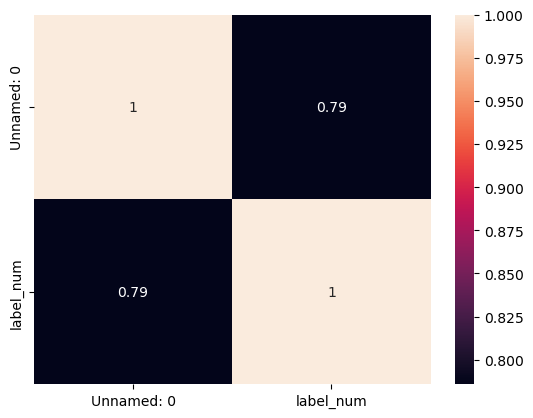

In [126]:
sb.heatmap(df.corr(),annot=True)

# Split X and Y

In [127]:
x=df[['label','text']]

In [128]:
y=df['label_num']

In [129]:
x

,label,text
0,ham,Subject enron methanol meter 988291 this is...
1,ham,Subject hpl nom for january 9 2001 see attac...
2,ham,Subject neon retreat ho ho ho we re around t...
3,spam,Subject photoshop windows office cheap mai...
4,ham,Subject re indian springs this deal is to boo...
...,...,...
5166,ham,Subject put the 10 on the ft the transport vol...
5167,ham,Subject 3 4 2000 and following noms hpl can ...
5168,ham,Subject calpine daily gas nomination julie ...
5169,ham,Subject industrial worksheets for august 2000 ...


In [130]:
y

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label_num, Length: 5171, dtype: int64

# Convert Catorigal Data into Numaric Data

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [133]:
vectorizer = TfidfVectorizer()
x= vectorizer.fit_transform(df['text'])

# Split Data Traning and Testing

In [135]:
from sklearn.model_selection import train_test_split 

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Choose a Machine Learning Algorithm

In [137]:
from sklearn.svm import SVC

In [138]:
svc_model=SVC()

In [139]:
svc_model.fit(x_train,y_train)

SVC()

# Make Prediction

In [141]:
from sklearn.metrics import accuracy_score
y_pred=svc_model.predict(x_test)

In [142]:
print('Percentage Accuracy:',100*accuracy_score(y_test,y_pred))

Percentage Accuracy: 98.16425120772946


In [149]:
print('wrong Prediction out of Total:')
print((y_test!=y_pred).sum(),'/',((y_test==y_pred).sum()+y_test!=y_pred).sum()+(y_test!=y_pred).sum())

wrong Prediction out of Total:
19 / 1054


# Visualization